In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(<Axes: title={'center': 'Binary'}>,
 Text(0.5, 1.0, 'Binary'))

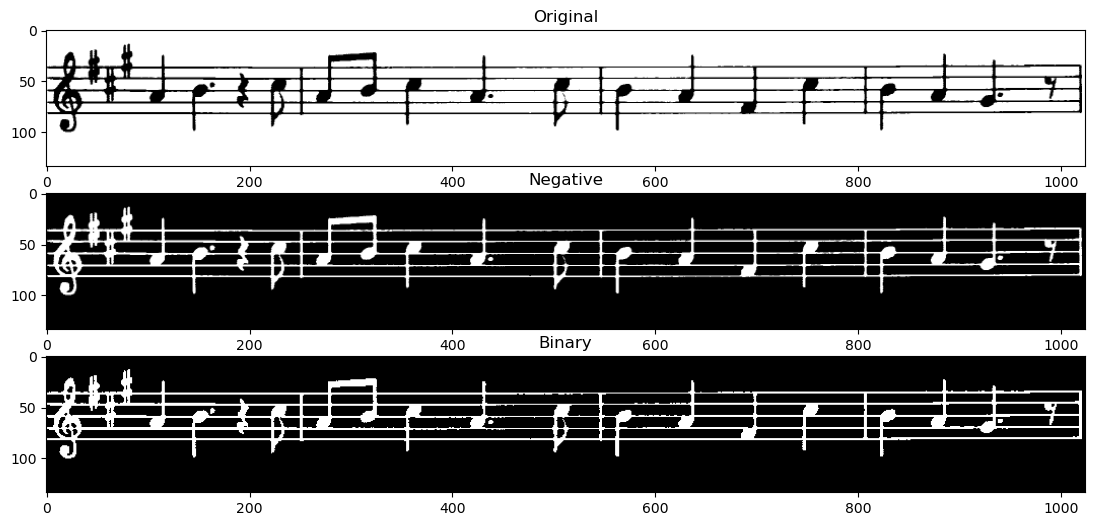

In [9]:
gray_image = cv2.imread('../data/images/notes.png' , 0)
negative_img = cv2.bitwise_not(gray_image)
binary_img  = cv2.adaptiveThreshold(negative_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, -2)

plt.figure(figsize=(17, 6))
plt.subplot(311), plt.imshow(gray_image, cmap='gray'), plt.title('Original')
plt.subplot(312), plt.imshow(negative_img, cmap='gray'), plt.title('Negative')
plt.subplot(313), plt.imshow(binary_img, cmap='gray'), plt.title('Binary')

In [10]:

cols = binary_img.shape[1]
horizontal_size = cols // 30

horizontal_stracture = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 1))
print(horizontal_stracture)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


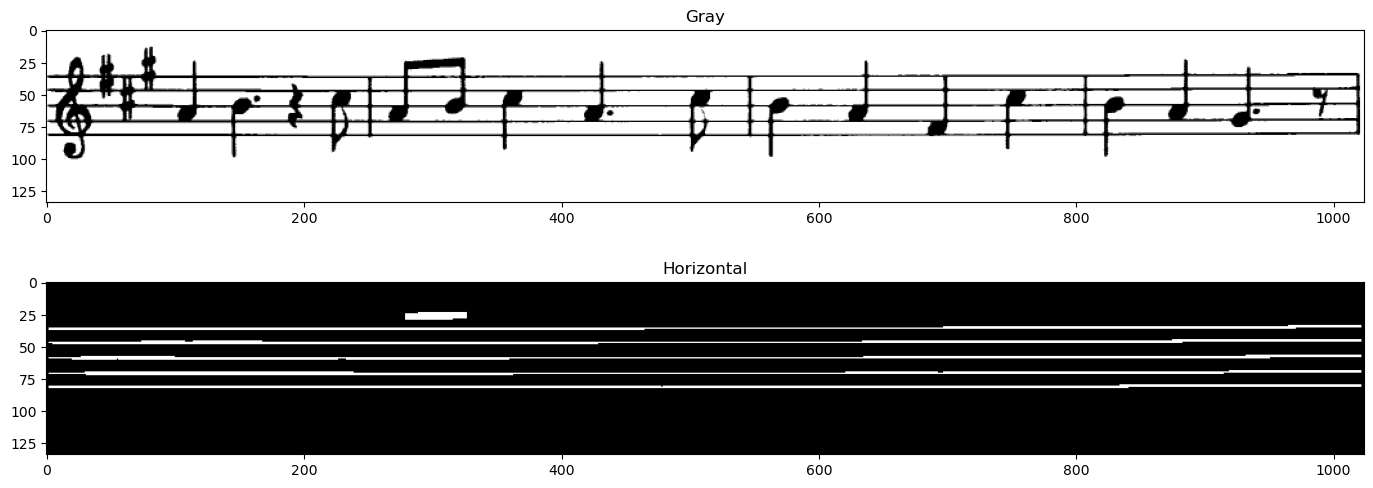

In [11]:
horizontal = cv2.morphologyEx(binary_img , cv2.MORPH_OPEN , horizontal_stracture)

plt.figure(figsize=(17,6))
plt.subplot(211);plt.imshow(gray_image , cmap='gray');plt.title('Gray');
plt.subplot(212);plt.imshow(horizontal, cmap='gray');plt.title('Horizontal');

In [12]:
rows = gray_image.shape[0]
vert_size = rows // 30

virt_strac = cv2.getStructuringElement(cv2.MORPH_RECT, (1, vert_size))
print(virt_strac)

[[1]
 [1]
 [1]
 [1]]


Text(0.5, 1.0, 'vertical Image')

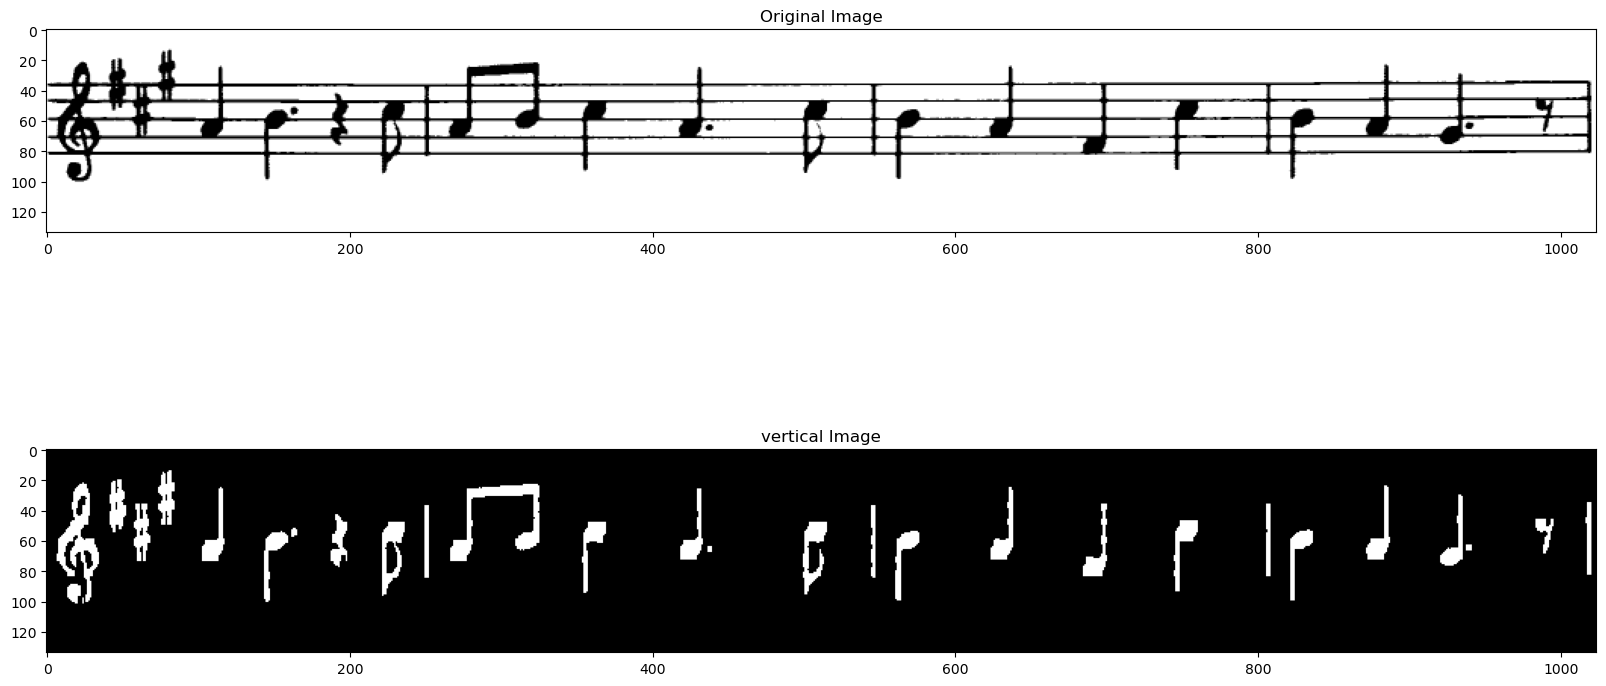

In [15]:
vert = cv2.morphologyEx(binary_img , cv2.MORPH_OPEN , virt_strac)

plt.figure(figsize=(20,10))
plt.subplot(211);plt.imshow(gray_image , cmap='gray');plt.title('Original Image')
plt.subplot(212);plt.imshow(vert, cmap='gray');plt.title('vertical Image')

Text(0.5, 1.0, 'Raw result')

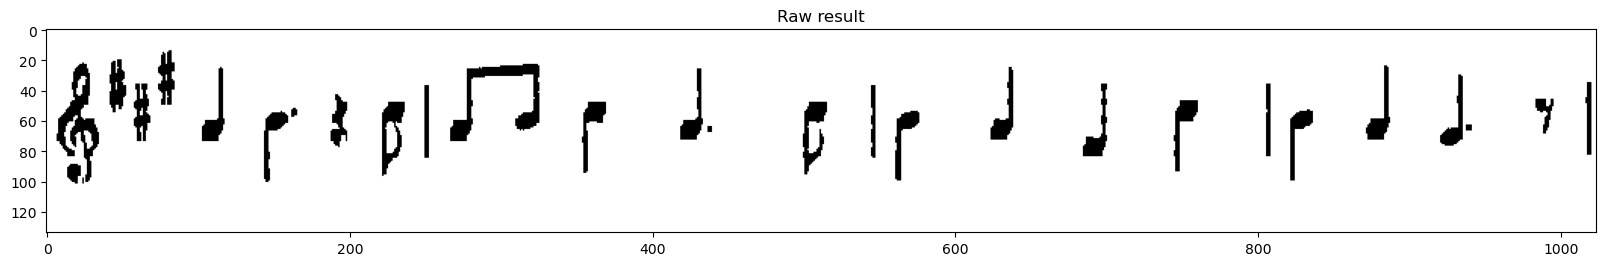

In [16]:
raw_result = cv2.bitwise_not(vert)

plt.figure(figsize=(20 , 7))
plt.imshow(raw_result , cmap='gray');plt.title('Raw result')

Text(0.5, 1.0, 'edge result')

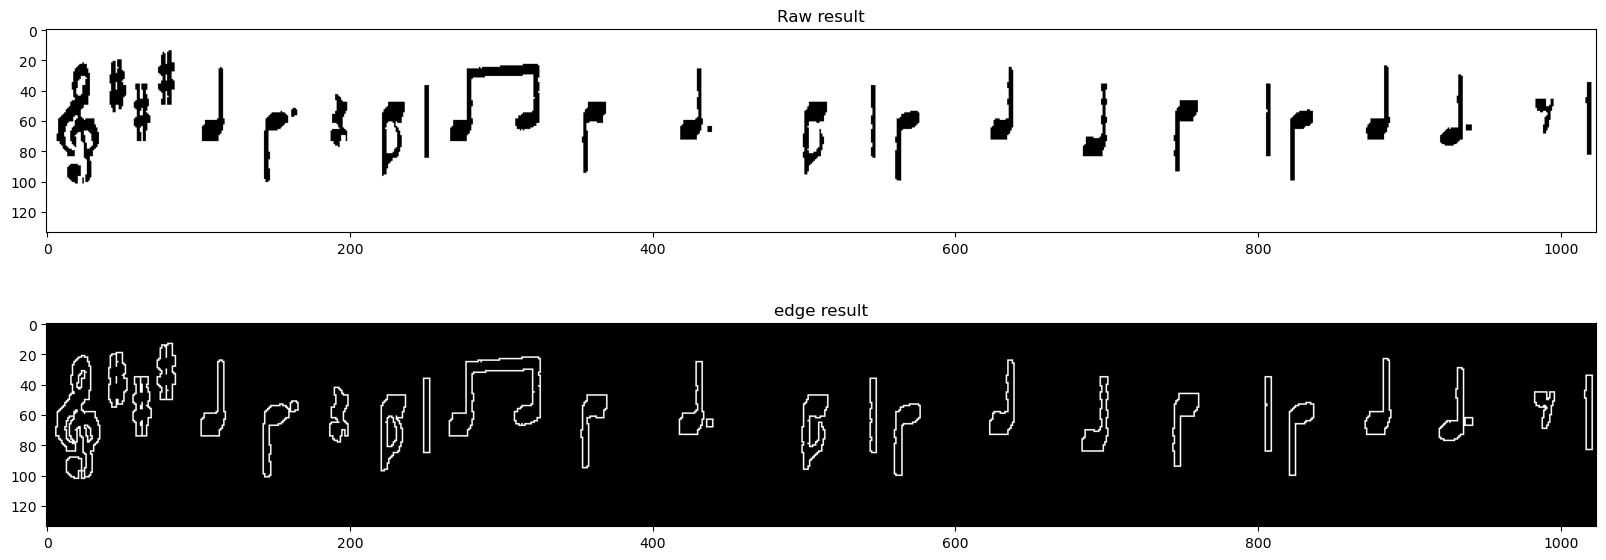

In [18]:
edge = cv2.adaptiveThreshold(raw_result , 255,cv2.ADAPTIVE_THRESH_MEAN_C , cv2.THRESH_BINARY ,3,-2)

plt.figure(figsize=(20 , 7))
plt.subplot(211);plt.imshow(raw_result , cmap='gray');plt.title('Raw result')
plt.subplot(212);plt.imshow(edge , cmap='gray');plt.title('edge result')

Text(0.5, 1.0, 'edge result')

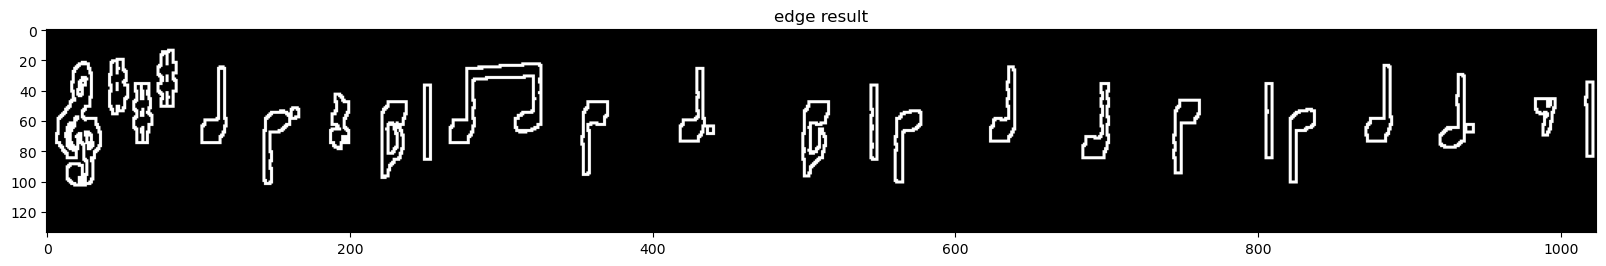

In [20]:
kernel = np.ones((2,2),np.uint8)
edge = cv2.dilate(edge , kernel)

plt.figure(figsize=(20 , 7))
plt.imshow(edge , cmap='gray');plt.title('edge result')

Text(0.5, 1.0, 'smooth result')

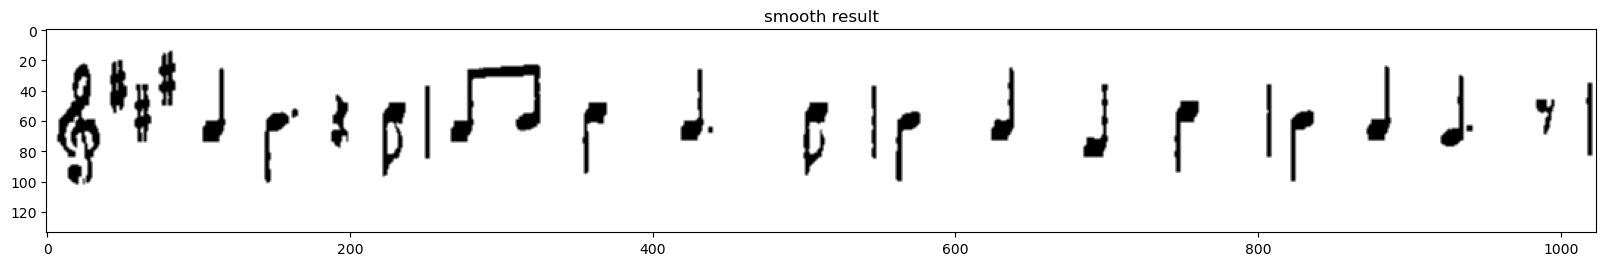

In [21]:
smooth = cv2.blur(raw_result , (2,2))
plt.figure(figsize=(20 , 7))
plt.imshow(smooth , cmap='gray');plt.title('smooth result')

Text(0.5, 1.0, 'final_result result')

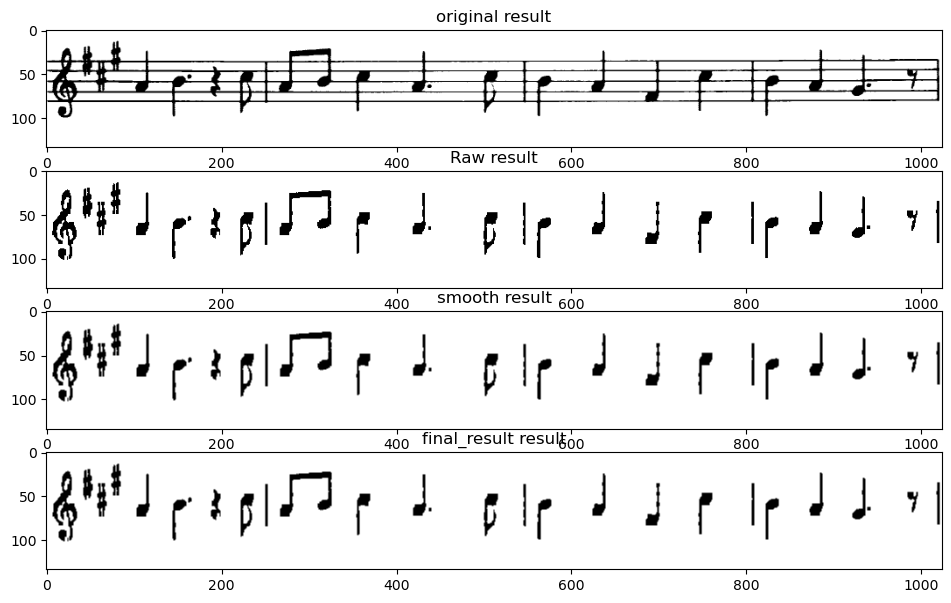

In [22]:
(rows , cols)=np.where(edge != 0)
final_result = np.copy(raw_result)
final_result[rows, cols] = smooth[rows , cols]
plt.figure(figsize=(20 , 7))
plt.subplot(411);plt.imshow(gray_image , cmap='gray');plt.title('original result')
plt.subplot(412);plt.imshow(raw_result , cmap='gray');plt.title('Raw result')
plt.subplot(413);plt.imshow(smooth , cmap='gray');plt.title('smooth result')
plt.subplot(414);plt.imshow(final_result, cmap='gray');plt.title('final_result result')
